# Working with AWR Design Environment

This notebook shows how to connect to AWRDE and retrieve data from a simulation.

## Setup

To communicate with COM enabled Windows applications we must import the com interface library using the raw win32com connection.

In [3]:
# import com library
import win32com.client

Once this is done, we can connect to AWRDE. If it is already running it will connect to that instance, otherwise it will be started up.  If you have multiple instances running and want to connect to a specific instance, see this [link](http://kb.awr.com/display/SCRIPTS/AWR+Scripting+in+Python)

In [4]:
# connect to awrde
mwo = win32com.client.Dispatch("MWOApp.MWOffice")

## Open Project, Get Data

Let's open the LPF_filter.emp example

In [8]:
import os
example_directory = mwo.Directories(8).ValueAsString
example_filename = os.path.join(example_directory, 'LPF_lumped.emp')
mwo.Open(example_filename)

True

Next we will simulate and bring some results back.

In [10]:
mwo.Project.Simulate()

In [49]:
graph = mwo.Project.Graphs('Passband and Stopband')
m1 = graph.Measurements(1)
m2 = graph.Measurements(2)
frequencies = m1.XValues
S11_dB = m1.YValues(0)  # in this case we have to specify a dimension
S21_dB = m2.YValues(0)

## Create a Plot
I'll use matplotlib to plot but we could use any other python based plotting package.

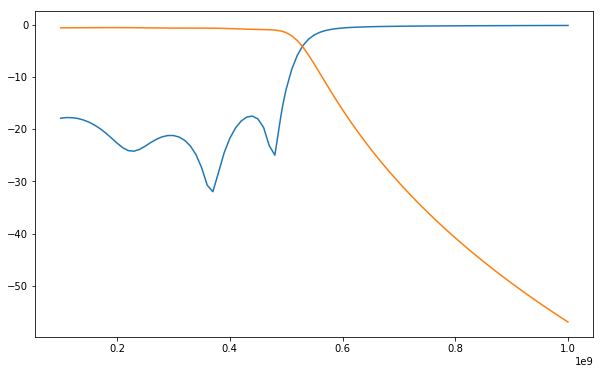

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10,6)  # set default plot size
plt.plot(frequencies, S11_dB)
plt.plot(frequencies, S21_dB)
plt.show()

## Perform Analysis

Often the reason for wanting to pull data into Python is to do further analysis.  For this we would like to get the data into a DataFrame.

In [54]:
import pandas as pd
S11db = pd.Series(S11_dB, index=frequencies)
S21db = pd.Series(S21_dB, index=frequencies)
df = pd.concat([S11db, S21db], axis=1)
df.columns=['S21', 'S11']
df.head()

,S21,S11
100000000.0,-17.874667,-0.547948
110000000.0,-17.757855,-0.546338
120000000.0,-17.773001,-0.543376
130000000.0,-17.920683,-0.539243
140000000.0,-18.203183,-0.534255


This is a little ugly with the frequencies in Hertz so let's convert them to GHz

In [55]:
df.index=df.index/1e9
df.head()

,S21,S11
0.10,-17.874667,-0.547948
0.11,-17.757855,-0.546338
0.12,-17.773001,-0.543376
0.13,-17.920683,-0.539243
0.14,-18.203183,-0.534255
